In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd


In [4]:
p = r"/Users/taddbindas/projects/soils_work/lgar-py/data/agu_2023/"
attr = pd.read_feather(os.path.join(p, "camels_671_attr_site_no.feather"))
attr.columns

Index(['p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'aridity',
       'high_prec_freq', 'high_prec_dur', 'low_prec_freq', 'low_prec_dur',
       'elev_mean', 'slope_mean', 'area_gages2', 'frac_forest', 'lai_max',
       'lai_diff', 'gvf_max', 'gvf_diff', 'dom_land_cover_frac',
       'dom_land_cover', 'root_depth_50', 'soil_depth_pelletier',
       'soil_depth_statsgo', 'soil_porosity', 'soil_conductivity',
       'max_water_content', 'sand_frac', 'silt_frac', 'clay_frac',
       'geol_1st_class', 'glim_1st_class_frac', 'geol_2nd_class',
       'glim_2nd_class_frac', 'carbonate_rocks_frac', 'geol_porostiy',
       'geol_permeability', 'site_no'],
      dtype='object')

In [5]:
force = pd.read_feather(os.path.join(p, "camels_671_forcing_pet.feather"))
force.columns

FileNotFoundError: [Errno 2] No such file or directory: '/Users/taddbindas/projects/soils_work/lgar-py/data/agu_2023/camels_671_forcing_pet.feather'

In [7]:
attr_site = attr[attr["site_no"] == "06332515"]
attr_site_reset = attr_site.reset_index()
attr_site_reset.to_feather("/Users/taddbindas/projects/soils_work/lgar-py/data/agu_2023/06332515_attr.feather", compression = "uncompressed")

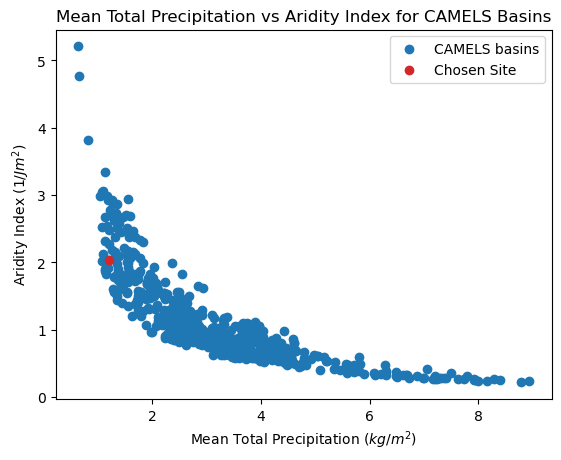

In [11]:
cols = ["site_no" , "p_mean", "aridity"]
attr_site = attr[attr["site_no"] == "06332515"]
attr_aridity = attr[cols]
plt.scatter(attr_aridity["p_mean"], attr_aridity["aridity"], color="tab:blue", label="CAMELS basins")
plt.scatter(attr_site["p_mean"], attr_site["aridity"], color="tab:red", label="Chosen Site")
plt.xlabel(r"Mean Total Precipitation $(kg/m^{2})$")
plt.ylabel(r"Aridity Index $(1/Jm^{2})$")
plt.title("Mean Total Precipitation vs Aridity Index for CAMELS Basins")
plt.legend()
plt.show()

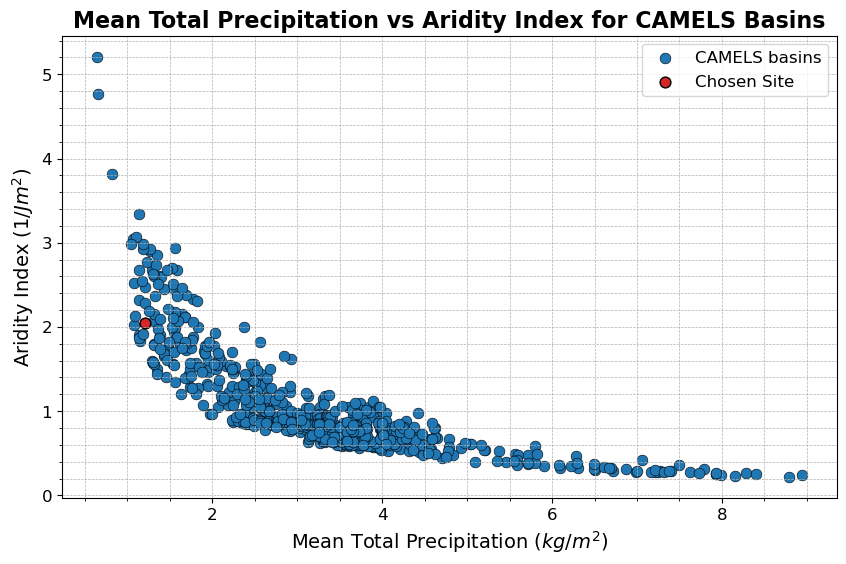

In [13]:
# Assuming 'attr' is your DataFrame and 'attr_site' and 'attr_aridity' are subsets of it
# attr_site = attr[attr["site_no"] == "06332515"]
# attr_aridity = attr[cols]

# Creating the scatter plot with professional styling
plt.figure(figsize=(10, 6))
# Additional aesthetic customizations
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.scatter(attr_aridity["p_mean"], attr_aridity["aridity"], color="tab:blue", edgecolor='black', linewidth=0.4, s=60, label="CAMELS basins")
plt.scatter(attr_site["p_mean"], attr_site["aridity"], color="tab:red", edgecolor='black', linewidth=1, s=60, label="Chosen Site")

# Adding titles and labels with a professional look
plt.title("Mean Total Precipitation vs Aridity Index for CAMELS Basins", fontsize=16, fontweight='bold')
plt.xlabel(r"Mean Total Precipitation $(kg/m^{2})$", fontsize=14)
plt.ylabel(r"Aridity Index $(1/Jm^{2})$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend with a professional appearance
plt.legend(fontsize='large')



# Show the plot
plt.show()

In [15]:
site_feather = force[force["site_no"] == "06332515"]
site_feather_reset = site_feather.reset_index()
site_feather_reset.to_feather("/Users/taddbindas/projects/soils_work/lgar-py/data/agu_2023/06332515_daily_forcings.feather", compression = "uncompressed")
site_feather.head()

,datetime,dayl(s),prcp(mm/day),srad(W/m2),swe(mm),tmax(C),tmin(C),vp(Pa),site_no,00060_Mean,pet_nldas
4346560,1980-01-01,29721.59,0.00,166.78,0.0,1.12,-13.55,200.00,06332515,0.18,0.286298
4346561,1980-01-02,29846.26,0.00,159.85,0.0,-4.37,-17.52,160.00,06332515,0.16,0.218393
4346562,1980-01-03,30052.00,0.00,147.15,0.0,-5.97,-17.30,160.00,06332515,0.16,0.214017
4346563,1980-01-04,30067.20,1.72,140.34,0.0,-3.38,-13.93,200.95,06332515,0.14,0.253753
4346564,1980-01-05,30067.20,1.54,133.13,0.0,-8.36,-17.94,159.85,06332515,0.12,0.155343


In [22]:
site_feather['datetime'] = pd.to_datetime(site_feather['datetime'])

# Set 'datetime' as the index
site_feather.set_index('datetime', inplace=True)

# Upsample from daily to hourly
site_feather_hourly = site_feather.resample('H').asfreq()

# Interpolate hourly values
site_feather_hourly = site_feather_hourly.interpolate(method='linear')

KeyError: 'datetime'

In [26]:
site_feather_hourly.rename(columns={
    'prcp(mm/day)': 'P(mm/h)',
    'pet_nldas': 'PET(mm/h)'
}, inplace=True)

In [27]:
site_feather_hourly_reset = site_feather_hourly.reset_index()
site_feather_hourly_reset.to_feather("/Users/taddbindas/projects/soils_work/lgar-py/data/agu_2023/06332515_hourly_forcings.feather", compression = "uncompressed")
site_feather_hourly.head()

,dayl(s),P(mm/h),srad(W/m2),swe(mm),tmax(C),tmin(C),vp(Pa),site_no,00060_Mean,PET(mm/h)
datetime,,,,,,,,,,
1980-01-01 00:00:00,29721.590000,0.0,166.78000,0.0,1.12000,-13.550000,200.000000,06332515,0.180000,0.286298
1980-01-01 01:00:00,29726.784583,0.0,166.49125,0.0,0.89125,-13.715417,198.333333,NaN,0.179167,0.283468
1980-01-01 02:00:00,29731.979167,0.0,166.20250,0.0,0.66250,-13.880833,196.666667,NaN,0.178333,0.280639
1980-01-01 03:00:00,29737.173750,0.0,165.91375,0.0,0.43375,-14.046250,195.000000,NaN,0.177500,0.277809
1980-01-01 04:00:00,29742.368333,0.0,165.62500,0.0,0.20500,-14.211667,193.333333,NaN,0.176667,0.274980
